In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

# SVM (Support Vector Machine)
* 매우 강력하고 선형/비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델
* 특히 복잡한 분류 문제에 잘 들어맞으며, 작거나 중간 크기의 데이터셋에 적합

# 1. 선형SVM 분류
## 1.1. 라지 마진 분류

In [78]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris.data[:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [79]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # 결정 경계에서 w0 * x0 + w1 * x1 + b = 0이므로
    # x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-', linewidth=2)
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)

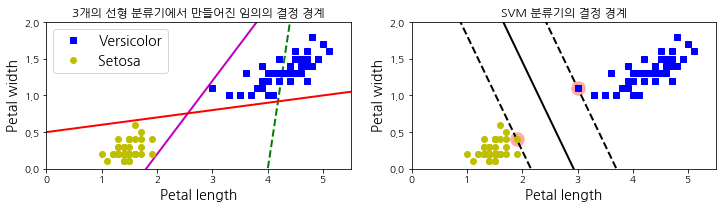

In [80]:
plt.figure(figsize=(12, 2.7))

plt.subplot(121)
# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5
plt.plot(x0, pred_1, 'g--', linewidth=2)
plt.plot(x0, pred_2, 'm-', linewidth=2)
plt.plot(x0, pred_3, 'r-', linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Versicolor')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Setosa')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.title('3개의 선형 분류기에서 만들어진 임의의 결정 경계')
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Versicolor')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Setosa')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.title('SVM 분류기의 결정 경계')
plt.axis([0, 5.5, 0, 2])

plt.show()

> * 선형 분류기 (왼쪽)
    * 점선 결정 경계를 만든 모델은 클래스를 적절히 분류하지 못함
    * 실선 결정 경계는 훈련 세트에 완벽히 동작하지만 결정 경계가 샘플에 너무 가까워 새로운 샘플에 대해 잘 작동하지 못할 것
* SVM 분류기 (오른쪽)
    * 두 개의 클래스를 나누고 있으며, 제일 가까운 훈련 샘플로부터 가능한 한 멀리 떨어져 있다.
    * 클래스 사이에 가장 폭이 넓은 도로를 찾는 것과 같아서 **라지 마진 분류 (large margin classfication)**라고 한다.
    * 도로 바깥쪽에 훈련 샘플을 더 추가해도 결정 경계에 전혀 영향을 미치지 않는다. (도로 경계에 위치한 샘플에 의해 전적으로 결정되기 때문에)
        * **서포트 벡터(support vector)** : 이 경계에 있는 샘플
            * 그래프에 동그라미로 표시

## SVM 특징
* 특성의 스케일에 민감하다.

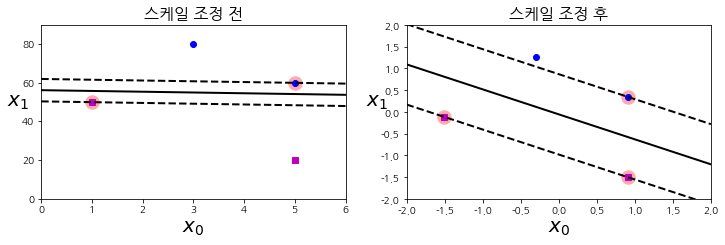

In [90]:
Xs = np.array([[1, 50],
               [5, 20],
               [3, 80],
               [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# SVM 분류 모델
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12, 3.2))

plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], 'bo')
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], 'ms')
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20, rotation=0)
plt.title('스케일 조정 전', fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], 'bo')
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], 'ms')
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20, rotation=0)
plt.title('스케일 조정 후', fontsize=16)
plt.axis([-2, 2, -2, 2])

plt.show()

> * 스케일 조정 전 (왼쪽)
    * 수직축 스케일이 수평축 스케일보다 훨씬 커서 가장 넓은 도로가 거의 수평에 가깝게 된다.
* 스케일 조정 후 (오른쪽)
    * 결정 경계가 훨씬 좋아진다.

## 1.2. 하드 마진 분류
* 모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있으면 **하드 마진 분류 (hard margin classification)**라고 한다.
* 하드 마진 분류 문제점
    * 데이터가 선형적으로 구분될 수 있어야 제대로 작동한다.
    * 이상치에 민감하다.

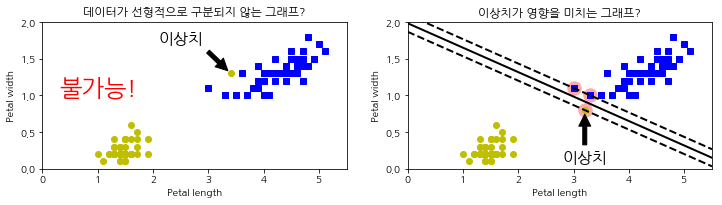

In [113]:
X_outliers = np.array([[3.4, 1.3],
                       [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel='linear', C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12, 2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], 'bs')
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], 'yo')
plt.text(0.3, 1.0, "불가능!", fontsize=24, color="red")
plt.annotate('이상치', xy=(X_outliers[0][0], X_outliers[0][1]), xytext=(2.5, 1.7),
            ha='center', arrowprops=dict(facecolor='black', shrink=0.1),
            fontsize=16)
plt.axis([0, 5.5, 0, 2])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('데이터가 선형적으로 구분되지 않는 그래프?')

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], 'bs')
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], 'yo')
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.annotate('이상치', xy=(X_outliers[1][0], X_outliers[1][1]), xytext=(3.2, 0.08),
            ha='center', arrowprops=dict(facecolor='black', shrink=0.1),
            fontsize=16)
plt.axis([0, 5.5, 0, 2])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('이상치가 영향을 미치는 그래프?')

plt.show()

> * 왼쪽 그래프 (선형 구분 안되는 그래프?)
    * 하드 마진을 찾을 수 없다.  
    → 데이터가 선형적으로 구분될 수 없어서 인 듯?  
* 오른쪽 그래프 (선형 구분되나 이상치가 영향미치는 그래프?)
    * 결정 경계가 위 『SVM 분류기의 결정 경계』 그래프의 결정 경계와 매우 다르고, 일반화가 잘될 것 같지 않다.

## 1.3. 소프트 마진 분류 (soft margin classification)
* 도로의 폭을 가능한 한 넓게 유지하는 것과 **마진 오류** 사이에 적절한 균형을 잡는 것?
> **마진 오류** (margin violation)  
: 샘플이 도로 중간이나 심지어 반대쪽에 있는 경우
* sckit-learn의 SVM 모델에서는 `C` 하이퍼파라미터로 이 균형을 조절할 수 있다.
    * `C`값을 줄이면, 도로 폭이 넓어지지만 마진 오류가 커짐
    * SVM 모델이 과대적합이라면 `C`를 감소시켜 모델을 규제할 수 있다.

### 1.3.1. 소프트 마진 분류 방법1: `LinearSVC` 클래스를 이용한 라지 마진 vs 마진 오류

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X = iris.data[:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 2).astype(np.float64) # Virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])
svm_clf.fit(X, y)

# SVM 분류 모델을 이용한 예측
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [124]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss='hinge', random_state=42)
svm_clf2 = LinearSVC(C=100, loss='hinge', random_state=42)

scaled_svm_clf1 = Pipeline([
    ('scaler', scaler),
    ('linear_svc', svm_clf1)
])
scaled_svm_clf2 = Pipeline([
    ('scaler', scaler),
    ('linear_svc', svm_clf2)
])
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [125]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

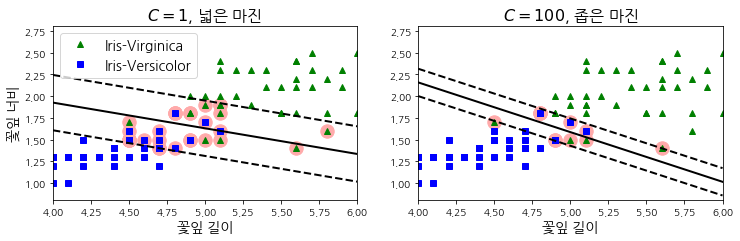

In [128]:
plt.figure(figsize=(12, 3.2))

plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$, 넓은 마진".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.title("$C = {}$, 좁은 마진".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.show()

> **선형적으로 구분되지 않는 데이터셋에 2개의 소프트 마진 SVM 분류기로 만든 결정 경계와 마진**
* C를 줄일 때 (왼쪽)
    * 도로의 폭이 넓어지지만 마진 오류도 커진다.(많은 샘플이 도로 안에 포함되었다.)
    * 이 분류기가 더 잘 일반화될 것 같아 보인다.
* 큰 C값 (오른쪽)
    * 마진 오류를 적게 냈지만, 마진이 좁아졌다.
    
* 사실 대부분 마진 오류는 결정 경계를 기준으로 올바른 클래스로 분류되기 때문에 이 훈련 세트에서 예측 에러는 마진 오류보다 작다.
* SVM 분류기는 로지스틱 회귀 분류기와 다르게 클래스에 대한 확률을 제공하지 않는다.
> `LinearSVC`는 `predict_proba()` 메서드를 제공하지 않지만,  
`SVC` 모델은 `probability=True`로 매개변수 지정 시 `predict_proba()` 메서드 제공한다. (default는 False)

### 1.3.2. 소프트 마진 분류 방법2: `SVC` 모델 사용
* `SVC(kernel="linear", C=1)` 같은 SVC 모델을 사용할 수 있다.
* 하지만 큰 훈련 세트에서는 속도가 매우 느려 권장되지 않는다.

### 1.3.3. 소프트 마진 분류 방법3: `SGDClassifier` 모델 사용
* `SGDClassifier(loss="hinge", alpha=1/(m*C))` 같은 SGDClassifier 모델을 사용할 수 있다.
> * $m$: 샘플 수
  * 확률적 경사 하강법은 샘플 하나씩 gradient를 계산하여 모델 파라미터를 갱신하기 때문에 훈련 세트 수에 반비례해야 비슷한 규제를 적용할 수 있다.

* 선형 SVM 분류기를 훈련시키기 위해 일반적인 확률적 경사 하강법을 적용한 것
* `LinearSVC`만큼 빠르게 수렴하지는 않지만, 데이터셋이 아주 커서 메모리에 적재할 수 없거나(외부 메모리 훈련), 온라인 학습으로 분류 문제 다룰 때 유용하다.
> **TIP**
 * `LinearSVC`는 규제에 편향을 포함시킨다.  
 그래서 훈련 세트에서 평균을 빼서 중앙에 맞춰야 한다.  
 `StandardScaler`를 사용하여 데이터 스케일을 맞추면 자동으로 이렇게 된다.  
 그리고 `loss="hinge"`로 지정해야 한다. (`loss` default는 `"squared_hinge"`)
    * `SVC(kernel="linear")`에 상응하는 `LinearSVC`를 설정법이다.
    * `LinearSVC`는 보통의 SVM 구현과 달리 규제에 편향을 포함하고 있어서 스케일을 맞추지 않고 SVC 모델과 비교하면 큰 차이가 난다.
    * 즉 위 **『C = 1, 넓은 마진』, 『C = 100, 좁은 마진』 그래프**는 `StandardScaler`로 데이터 스케일을 변경하고 `LinearSVC`로 결정 경계를 찾은 후 원본 좌표 공간으로 가중치와 편향의 스케일을 복원하여 나타낸 것이다.
* 훈련 샘플보다 특성이 많지 않다면 성능을 높이기 위해 `dual=False`로 지정해야 한다.

# 2. 비선형 SVM 분류
## 2.1. 비선형 데이터셋을 다루는 방법1: 다항 특성 추가
* 비선형 데이터셋을 다루는 한 가지 방법 : 다항 특성과 같은 특성을 더 추가하는 것
    * 이렇게 하면 선형적으로 구분되는 데이터셋이 만들어질 수 있다.

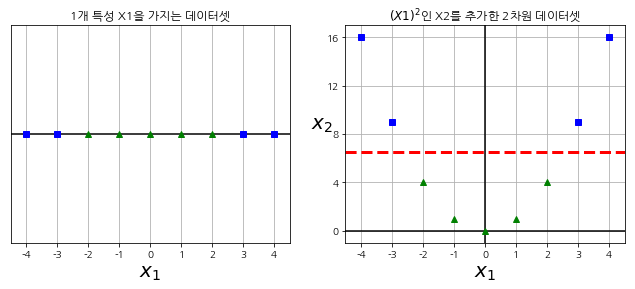

In [151]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][y==1], np.zeros(5), 'g^')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r'$x_1$', fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])
plt.title('1개 특성 X1을 가지는 데이터셋')

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], 'bs')
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], 'g^')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], 'r--', linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])
plt.title('$(X1)^2$인 X2를 추가한 2차원 데이터셋')

plt.show()

> * 하나의 특성 $x_1$만 가지는 데이터셋 (왼쪽)
    * 선형적으로 구분이 안된다.
* $x_2 = (x_1)^2$를 추가해 만든 2차원 데이터셋 (오른쪽)
    * 완벽하게 선형적으로 구분할 수 있다.

### 2.1.1. scikit-learn을 사용한 비선형 SVM 분류
#### 두 개의 반달 모양 데이터셋 `make_moons` 분류

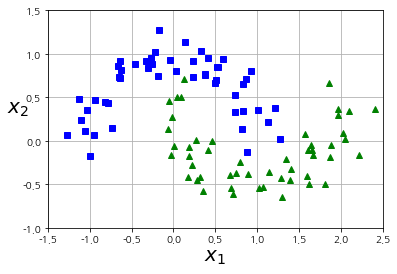

In [152]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])    
plt.show()

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=2000, random_state=42))
])
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=2000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

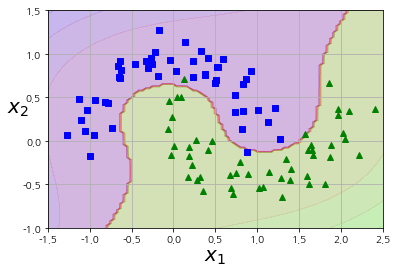

In [160]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## 2.2. 비선형 데이터셋을 다루는 방법2: 다항식 커널
* **커널 트릭 (kernel tric)**을 써서 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다.
* 사실 어떤 특성도 추가하지 않기 때문에 엄청난 수의 특성 조합이 생기지 않는다.
* `SVC` 클래스에 구현되어 있다.
* `coef0` : 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절한다. (default는 `0`)
    * 다항식 커널에 있는 상수항 $r$을 뜻함
    * 다항식 커널은 차수가 높아질수록 1보다 작은 값과 1보다 큰 값의 차이가 크게 벌어지므로, `coef0`을 적절한 값으로 지정하면 고차항의 영향을 줄일 수 있다.

In [164]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [165]:
poly100_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

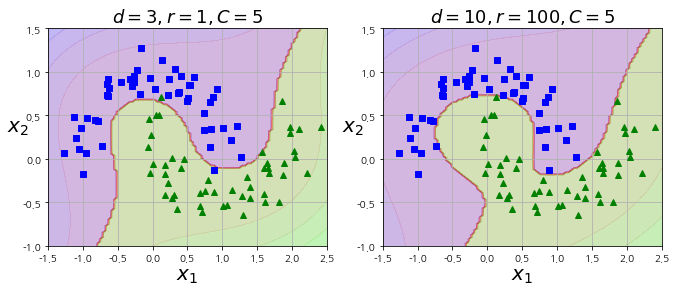

In [169]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r'$d=3, r=1, C=5$', fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r'$d=10, r=100, C=5$', fontsize=18)
          
plt.show()

> * 3차 다항식 커널을 사용한 SVM 분류기 (왼쪽)
* 10차 다항식 커널을 사용한 SVM 분류기 (오른쪽)

* 모델이 과대적합이라면 다항식 차수를 줄여야 한다.
* 과소적합이라면 차수를 늘려야 한다.

> **TIP**  
그리드 탐색을 사용하여 처음에는 그리드 폭을 크게 하여 빠르게 검색하고, 그 다음에는 최적의 값을 찾기 위해 세밀하게 검색한다.  
하이퍼파라미터의 역할을 잘 알고 있으면 파라미터 공간에서 올바른 지역을 탐색하는 데 도움이 된다.

## 2.3.  비선형 데이터셋을 다루는 방법3: 유사도 특성 추가
* 각 샘플이 특정 **랜드마크 (landmark)**와 얼마나 닮았는지 측정하는 **유사도 함수 (similarity function)**로 계산한 특성을 추가하는 방법

#### 예) 앞의 1차원 데이터셋에 두 개의 랜드마크 $x_1 = -2$와 $x_1 = 1$ 추가하고, $\gamma = 0.3$인 가우시안 방사 기저 함수(RBF)를 유사도 함수로 정의
* **가우시안 RBF**
$$ \phi_{\gamma}(\mathbf{x}, ℓ) = exp(-\gamma ||\mathbf{x} - ℓ||^2) $$
    * 이 함수값은 0 ~ 1까지 변화하며 종 모양으로 나타난다.
        * 0 : 랜드마크에서 아주 멀리 떨어진 경우
        * 1 : 랜드마크와 같은 위치일 경우
    > * $ℓ$ : 랜드마크 지점
     * $\gamma$는 0보다 커야 하며 값이 작을수록 폭이 넓은 종 모양이 된다. 
* 예를 들어 $x_1 = -1$ 샘플 살펴보기
    * 이 샘플은 첫 번째 랜드마크에서 1만큼 떨어져 있고, 두 번째 랜드마크에서 2만큼 떨어져 있다.
    * 그러므로 새로 만든 특성은 다음과 같다.
        * $x_2 = exp(-0.3×1^2) ≒ 0.74$
        * $x_3 = exp(-0.3×2^2) ≒ 0.30$

In [208]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

In [209]:
gamma = 0.3

x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print('Phi({}, {}) = {}'.format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


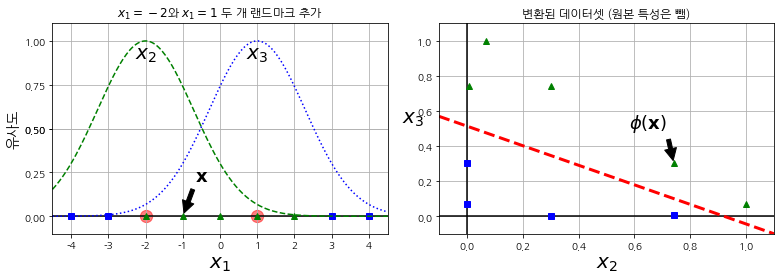

In [210]:
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c='red') # 랜드마크
plt.plot(X1D[:, 0][yk==0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][yk==1], np.zeros(5), 'g^')
plt.plot(x1s, x2s, 'g--')
plt.plot(x1s, x3s, 'b:')
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.5, 0.75, 1])
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'유사도', fontsize=14)
plt.annotate(r'$\mathbf{x}$', xy=(X1D[3, 0], 0), xytext=(-0.5, 0.20), ha='center',
            arrowprops=dict(facecolor='black', shrink=0.1), fontsize=18)
plt.text(-2, 0.9, '$x_2$', ha='center', fontsize=20)
plt.text(1, 0.9, '$x_3$', ha='center', fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])
plt.title('$x_1=-2$와 $x_1=1$ 두 개 랜드마크 추가')

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], 'bs')
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], 'g^')
plt.xlabel(r'$x_2$', fontsize=20)
plt.ylabel(r'$x_3$', fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$', xy=(XK[3, 0], XK[3, 1]), 
             xytext=(0.65, 0.50), ha='center', fontsize=18,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.plot([-0.1, 1.1], [0.57, -0.1], 'r--', linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.title('변환된 데이터셋 (원본 특성은 뺌)')

plt.tight_layout()
plt.show()

> * 변환된 데이터셋 (오른쪽 그래프)
    * 선형적으로 구분이 가능하다.
    
> 왼쪽 그래프에서 사각형 샘플은 두 개의 랜드마크 중 적어도 하나와 멀리 떨어져 있으므로 오른쪽 그래프에서 새로 만들어진 특성에서 이 샘플들은 0에 아주 가깝게 나타나 있다.
    
#### 랜드마크 선택법
* 데이터셋에 있는 모든 샘플 위치에 랜드마크를 설정한다.
    * 이렇게 하면 차원이 매우 커지고 따라서 변환된 훈련 세트가 선형적으로 구분될 가능성이 높다.
    * 단점  
        * 훈련 세트에 있는 $n$개의 특성을 가진 $m$개의 샘플이 $m$개의 특성을 가진 $m$개의 샘플로 변환된다는 것 (원본 특성은 제외한다고 가정).  
        * 훈련 세트가 매우 클 경우 동일한 크기의 아주 많은 특성이 만들어진다.
        

## 2.4. 비선형 데이터셋을 다루는 방법4: 가우시안 RBF 커널
* 커널 트릭을 사용해 유사도 특성을 많이 추가하는 것과 같은 비슷한 결과를 실제로 특성을 추가하지 않고 얻는 방법
    * 다항 특성 방식, 유사도 특성 방식은 추가 특성을 모두 계산하려면 연산 비용이 많이 들고, 특히 훈련 세트가 클 경우 더 그렇다.
    
#### SVC 모델에 가우시안 RBF 커널 적용

In [212]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

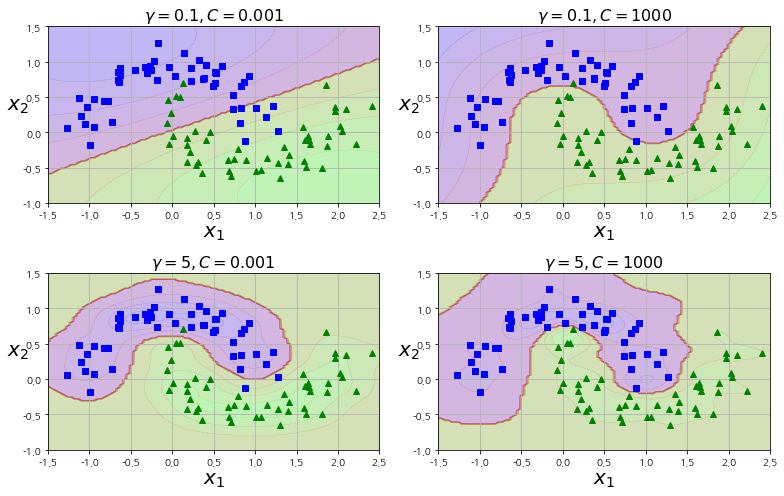

In [218]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf', gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r'$\gamma = {}, C = {}$'.format(gamma, C), fontsize=16)
    
plt.tight_layout()
plt.show()

> **RBF 커널을 사용한 SVM 분류기 그래프**
* $\gamma$를 증가시키면 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아진다.
    * 결정 경계가 조금 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어진다.
* 작은 $\gamma$ 값은 넓은 종 모양 그래프를 만들며 샘플이 넓은 범위에 걸쳐 영향을 주므로, 결정 경계가 더 부드러워 진다.
* 결국 하이퍼파라미터 $\gamma$가 규제 역할을 한다.
    * 모델이 과대적합일 경우 감소시키고, 과소적합일 경우엔 증가시켜야 한다.
    * 하이퍼파라미터 `C`와 비슷하다.
        * 따라서 모델 복잡도 조절하려면 $\gamma$와 C를 함께 조정하는 것이 좋다.
        
* 다른 커널들은 거의 사용되지 않는다.

> **TIP**
 * 여러 커널 중 선택 법
    * 선형 커널을 가장 먼저 시도해볼 것
        * `LinearSVC`가 `SVC(kernel="linear")`보다 훨씬 빠르다.  
        특히 훈련 세트가 아주 크거나 특성 수가 많을 경우
    * 훈련 세트가 너무 크지 않다면 가우시안 RBF 커널을 시도해보면 좋다.
        * 대부분의 경우 이 커널이 잘 들어맞는다.
    * 시간, 컴퓨터 성능이 충분하다면(특히 훈련 데이터 구조에 특화된 커널이 있는 경우) 교차 검증과 그리드 탐색을 사용해 다른 커널을 좀 더 시도해 볼 수 있다.

## 2.5. 계산 복잡도
| 클래스 |시간 복잡도 | 외부 메모리 학습 지원 | 스케일 조정 필요성 | 커널 트릭 |
|--------|------------|-----------------------|----------------------|-----------|
| LinearSVC | $O(m×n)$ | 아니오 | 예 | 아니오 |
| SGDClassifier | $O(m×n)$ | 예 | 예 | 아니오 |
| SVC | $O(m^2×n) ～ O(m^3×n)$ | 아니오 | 예 | 예 |

#### `LinearSVC`
* 선형 SVM을 위한 최적화된 알고리즘을 구현한 `liblinear` 라이브러리를 기반으로 한다.
    * 이 라이브러리는 커널 트릭을 지원하지 않지만 훈련 샘플과 특성 수에 거의 선형적으로 늘어난다.
* 정밀도를 높이면 알고리즘의 수행 시간이 길어진다.
    * 허용오차 하이퍼파라미터 $\epsilon$으로 조절(scikit-learn에서 `tol` 매개변수)
    * 대부분의 분류 문제는 허용오차를 기본값으로 두면 잘 작동한다.
        * `SVC`의 `tol` default는 0.001
        * `LinearSVC`의 `tol` default는 0.0001
        
#### `SVC`
* 커널 트릭 알고리즘을 구현한 `libsvm` 라이브러리를 기반으로 한다.
* 시간 복잡도가 커 훈련 샘플 수가 커지면(예를 들면 수십만개 샘플) 엄청나게 느려진다.
* 복잡하지만 작거나 중간 규모의 훈련 세트에 잘 맞는다.
* 하지만 특성의 개수에는, 특히 **희소 특성(sparse features)**인 경우에는 잘 확장된다.
> **희소 특성**  
각 샘플에 0이 아닌 특성이 몇 개 없는 경우

    * 이런 경우 알고리즘 성능이 샘플이 가진 0이 아닌 특성의 평균 수에 거의 비례한다.

# 3. SVM 회귀
* 제한된 마진 오류(도로 밖의 샘플) 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습한다. (일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 한 최대가 되도록 하는 대신)
* 도로 폭은 하이퍼파라미터 $\epsilon$으로 조절한다.
    > 허용오차를 설명할 때 나온 하이퍼파라미터 $\epsilon$과 혼동하지 말 것  
    SVM 회귀모델인 `SVR`과 `LinearSVR`에서 허용오차는 `tol` 매개변수(각각 default 값은 0.001, 0.0001), 도로폭은 `epsilon`으로 지정한다.

In [220]:
from sklearn.svm import LinearSVR

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [221]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) > svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

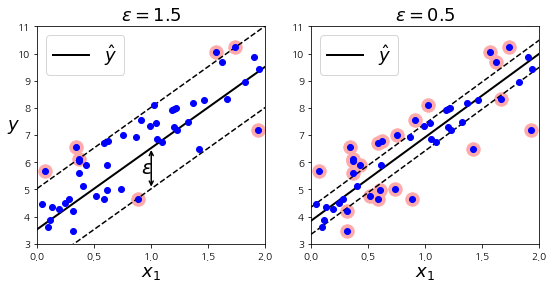

In [236]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, 'k-', linewidth=2, label=r'$\hat{y}$')
    plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
    plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, 
                facecolors='#FFAAAA')
    plt.plot(X, y, 'bo')
    plt.xlabel(r'$x_1$', fontsize=18)
    plt.legend(loc='upper left', fontsize=18)
    plt.axis(axes)
    
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r'$\epsilon = {}$'.format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r'$y$', fontsize=18, rotation=0)
plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data',
             xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon), textcoords='data',
             arrowprops={'arrowstyle': '<->', 'linewidth': 1.5})
plt.text(0.91, 5.6, r'$\epsilon$', fontsize=20)

plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r'$\epsilon = {}$'.format(svm_reg2.epsilon), fontsize=18)

plt.show()

> 무작위로 생성한 선형 데이터셋에 훈련시킨 두 개의 선형 SVM 회귀 모델 그래프
* 마진을 크게($\epsilon = 1.5$)한 SVM 회귀 (왼쪽)
* 마진을 작게($\epsilon = 0.5$)한 SVM 회귀 (오른쪽)
* 마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없다.
    * 그래서 이 모델을 **$\epsilon$에 민감하지 않다 ($\epsilon$-insensitive)**고 말한다.

#### 임의의 2차방정식 형태의 훈련 세트에 2차 다항 커널을 사용한 SVM 회귀

In [237]:
from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg1 = SVR(kernel='poly', gamma='auto', degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel='poly', gamma='auto', degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

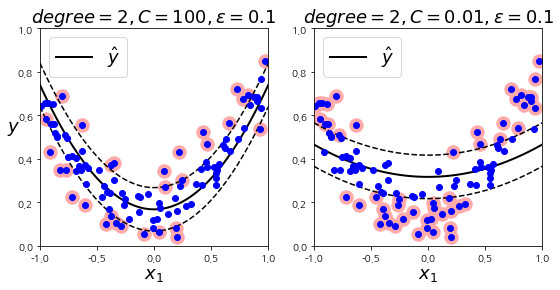

In [241]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r'$degree={}, C={}, \epsilon={}$'.format(svm_poly_reg1.degree, 
                        svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r'$y$', fontsize=18, rotation=0)

plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r'$degree={}, C={}, \epsilon={}$'.format(svm_poly_reg2.degree, 
                        svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

plt.show()

> * (커널 트릭을 제공하는) scikit-learn의 `SVR`을 사용해 만든 규제가 거의 없는(아주 큰 `C`) 모델 (왼쪽)
* 규제가 훨씬 많은(작은 `C`) 모델

* `SVR` : `SVC`의 회귀 버전
    * (`SVC`처럼) 훈련 세트가 커지면 훨씬 느려진다.
* `LinearSVR` : `LinearSVC`의 회귀 버전 
    * (`LinearSVC`처럼) 필요한 시간이 훈련 세트의 크기에 비례해서 선형적으로 늘어난다.

# 연습 문제
## 8.
선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.

In [242]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)] # Peta length, Petal width
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [256]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(C=C, loss='hinge', random_state=42)
svm_clf = SVC(kernel='linear', C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.001, 
                        alpha=alpha, max_iter=100000, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print('LinearSVC:                   ', lin_clf.intercept_, lin_clf.coef_)
print('SVC:                         ', svm_clf.intercept_, svm_clf.coef_)
print('SGDClassifier(alpha={:.5f}): '.format(sgd_clf.alpha), sgd_clf.intercept_,
     sgd_clf.coef_)

LinearSVC:                    [0.28474027] [[1.0536456  1.09903032]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200):  [0.319] [[1.12072936 1.02666842]]


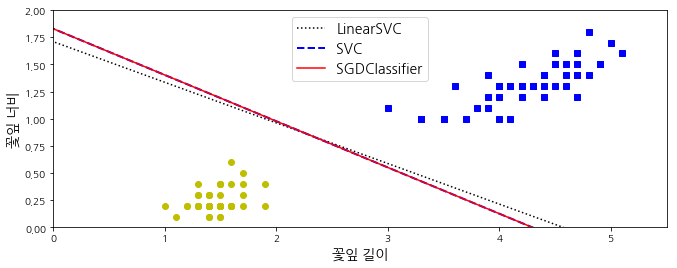

In [263]:
# 각 결정 경계의 기울기와 편향 계산
w1 = -lin_clf.coef_[0, 0] / lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0] / lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0] / svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0] / svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0] / sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0] / sgd_clf.coef_[0, 1]

# 결정 경계 원본 스케일로 변환
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# 결정 경계 그리기
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], 'k:', label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

## 9.
MNIST 데이터셋에 SVM 분류기를 훈련시켜보세요. SVM 분류기는 이진 분류기라서 OvA 전략을 사용해 10개의 숫자를 분류해야 합니다. 처리 속도를 높이기 위해 작은 검증 세트로 하이퍼파라미터를 조정하는 것이 좋습니다. 어느 정도까지 정확도를 높일 수 있나요?

In [266]:
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784', version=1)
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
X = mnist.data
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [267]:
# 많은 훈련 알고리즘은 훈련 샘플 순서에 민감하므로 섞는 것이 좋다.
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]

In [268]:
# 이 모델은 자동으로 OvA(OvR) 전략을 사용하므로 특별히 처리해 줄 것이 없다.
lin_clf = LinearSVC(max_iter=10000, random_state=42)
lin_clf.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [270]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8847333333333334

MNIST에서 88% 정확도면 나쁜 성능이다. (선형 모델이 MNIST 문제에 너무 단순하기 때문에)

#### 데이터 스케일 조정 후 훈련

In [272]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [274]:
lin_clf = LinearSVC(max_iter=10000, random_state=42)
lin_clf.fit(X_train_scaled, y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [275]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9274166666666667

여전히 MNIST에서 좋은 성능이 아니다.

#### RBF 커널로 SVC 적용

In [276]:
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [277]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.94615

6배나 적은 데이터 훈련으로 더 좋은 성능을 얻었다.

#### 교차 검증을 사용한 랜덤 탐색으로 하이퍼파라미터 튜닝
진행을 빠르게 하기 위해 작은 데이터셋으로 작업

In [282]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

params_distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, params_distributions, cv=3, n_iter=10,
                                  verbose=2, n_jobs=-1)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   24.4s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020349D2D4A8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020349D2D0F0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [283]:
rnd_search_cv.best_estimator_

SVC(C=10.260353357356722, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001489673989428249,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [284]:
rnd_search_cv.best_score_

0.86

1,000개 샘플만 사용했기 때문에 점수가 낮다.  

#### 전체 데이터셋으로 최선의 모델 재훈련
몇 시간 걸릴 수 있다.

In [285]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=10.260353357356722, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001489673989428249,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [286]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9995166666666667

In [287]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.972

아주 나쁘지 않지만 확실히 모델이 다소 과대적합  
하이퍼파라미터를 조금 더 수정할 수 있지만(가령 C와 /나 gamma를 감소시킨다), 그렇게 하면 테스트 세트에 과대적합될 위험이 있다.  
훈련 세트를 더 많이 사용해서 더 오래 랜덤 서치를 수행하면 이런 값을 얻을 수 있다.  

## 10. 
캘리포니아 주택 가격 데이터셋에 SVM 회귀를 훈련시켜보세요.

In [289]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

#### 훈련 세트, 테스트 세트 나누기

In [290]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

#### 스케일 조정

In [293]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### LinearSVR 훈련

In [294]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(max_iter=10000, random_state=42)
lin_svr.fit(X_train_scaled, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
     random_state=42, tol=0.0001, verbose=0)

#### 훈련 세트 성능 확인

In [295]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.952627996421772

#### RMSE

In [296]:
np.sqrt(mse)

0.976026637147661

훈련 세트 타겟은 $10,000 단위  
이 모델의 에러 : 대략 $10,000 정도  
썩 훌륭하지 않다.

#### RBF 커널로 모델 만들기
C와 gamma의 적절한 값을 찾기 위해 교차 검증을 사용한 랜덤 서치를 적용

In [300]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, cv=3, n_iter=10,
                                  verbose=2, random_state=42, n_jobs=-1)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020300FED518>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020300FEDB38>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [301]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

#### 훈련 세트에서 RMSE 측정

In [302]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785357

선형 모델보다 훨씬 나아짐

#### 이 모델로 테스트 세트 평가

In [303]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

1.106667307704326